In [1]:
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN , KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


X= pd.read_csv("Customer Segmentation.csv")


In [2]:
def hopkins_statistic(X):
    X=X.values  
    sample_size = int(X.shape[0]*0.05) 
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0]
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    w_distances = w_distances[: , 1]
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    H = u_sum/ (u_sum + w_sum)
    return H

In [3]:
columns_to_remove = ['first_name','last_name', 'ip_address', 'title', 'email', 'country', 'latitude',
                     'longitude', 'phone', 'street_address', 'street_name', 'street_suffix',
                     'linkedin_skill', 'time_zone']

X = X.drop(columns=columns_to_remove)
X = X[(X['gender'] == 'Male') | (X['gender'] == 'Female')]

In [4]:
e=LabelEncoder()

X['gender']=e.fit_transform(X['gender'])
X['city']=e.fit_transform(X['city'])
X['country_code']=e.fit_transform(X['country_code'])
X['company_name']=e.fit_transform(X['company_name'])
X['department']=e.fit_transform(X['department'])
X['job_title']=e.fit_transform(X['job_title'])
X['language']=e.fit_transform(X['language'])
X['university']=e.fit_transform(X['university'])


In [5]:
hopkins_statistic(X)

0.7060796258838844

In [6]:
scaler = StandardScaler()
scaler.fit(X)
scaled_ds = pd.DataFrame(scaler.transform(X),columns= X.columns )

In [7]:
scaled_ds

,gender,city,country_code,street_number,company_name,department,job_title,language,university
0,0.99976,0.661141,0.841515,-0.472660,-1.263722,0.724471,-1.019096,-0.813105,0.627393
1,0.99976,-0.124101,0.841515,-0.254439,-0.926416,1.303970,-0.269914,-0.491479,0.629534
2,0.99976,1.594000,-1.003877,-0.472703,-1.090511,1.303970,-0.419751,-1.420621,-1.102506
3,-1.00024,1.439061,1.456646,-0.430472,0.340761,-1.014025,-0.063889,0.866497,-0.489120
4,-1.00024,1.172969,-1.249930,-0.199360,0.605136,0.724471,0.048488,1.009442,0.863969
...,...,...,...,...,...,...,...,...,...
45820,0.99976,-0.110482,-1.003877,-0.473046,-0.361200,-0.434526,1.041154,1.259596,-0.938723
45821,-1.00024,0.556578,-0.096559,-0.451630,-0.753205,-0.144777,0.348161,-0.991786,1.297514
45822,-1.00024,-0.498856,-1.003877,-0.216791,0.623369,1.014221,-0.307373,-1.599302,-0.938723
45823,0.99976,-0.934532,-0.988499,-0.471033,-0.005661,-1.593523,1.640499,0.116036,-1.413481


In [8]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,45825.0,5.333916e-17,1.020032,-2.989380,-0.723924,-0.023490,0.739348,3.363306
col2,45825.0,-3.101114e-17,1.007379,-3.296141,-0.715355,0.000704,0.710814,3.618790
col3,45825.0,2.480891e-17,1.003772,-3.035659,-0.708866,-0.033195,0.664470,4.158646


In [9]:
PCA_ds

,col1,col2,col3
0,0.352876,-0.331418,-0.059478
1,-0.151322,-0.007916,0.114925
2,1.211571,0.547967,-1.449866
3,1.787287,0.327087,0.455616
4,-0.353642,0.884106,-1.618977
...,...,...,...
45820,0.248738,0.158027,-0.111843
45821,-0.843947,0.864907,0.046393
45822,-0.254116,0.340950,-1.386087
45823,0.007990,-0.367353,0.820966


In [10]:
hopkins_statistic(PCA_ds)

0.8822479591512015

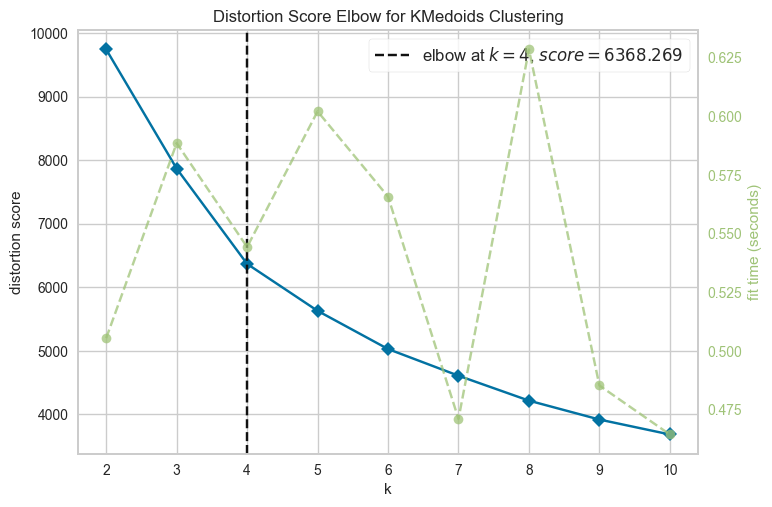

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
sample_size = 4000
random_indices = sample(range(0, PCA_ds.shape[0], 1), sample_size)
PCA_ds_sample = PCA_ds.iloc[random_indices]
Elbow_M = KElbowVisualizer(KMedoids(), k=10)
Elbow_M.fit(PCA_ds_sample)
Elbow_M.show()

In [12]:
PCA_ds_sample

,col1,col2,col3
32927,-1.059123,1.713718,0.759638
26115,0.805328,-0.144003,-1.822845
15012,-0.517723,2.382577,1.155230
6742,-0.256640,1.682622,0.521324
27934,1.749632,-1.999007,1.077719
...,...,...,...
45204,-0.060586,0.003580,-1.641611
16113,0.586249,-0.249245,0.364666
40028,0.089243,0.467774,0.529851
25710,0.115438,-0.429541,0.302175


<Figure size 1200x600 with 0 Axes>

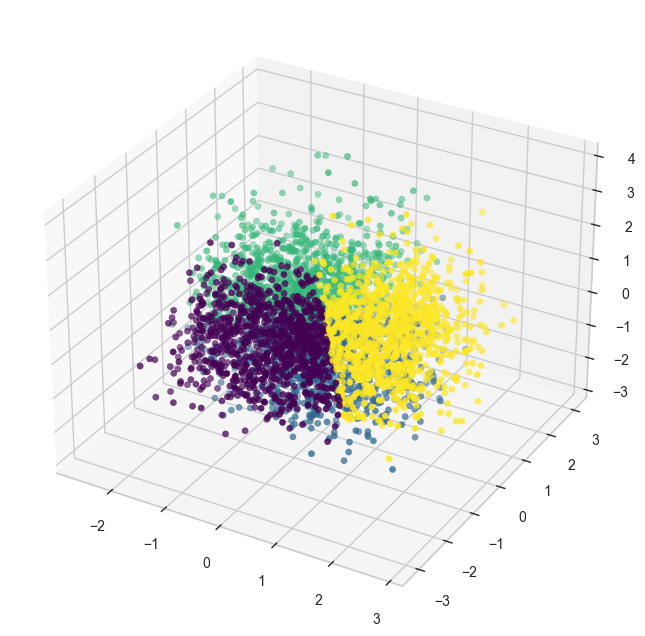

In [13]:
kmedoids = KMedoids(n_clusters=4, random_state=0)
kmedoids.fit(PCA_ds_sample)

plt.figure(figsize=(12, 6))

x =PCA_ds_sample["col1"]
y =PCA_ds_sample["col2"]
z =PCA_ds_sample["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=kmedoids.labels_,cmap='viridis', marker="o" )

<Figure size 1200x600 with 0 Axes>

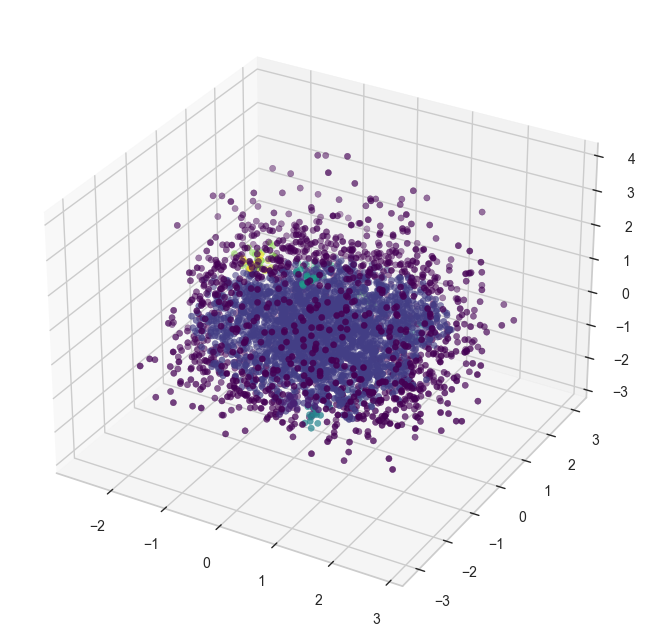

In [14]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(PCA_ds_sample)

plt.figure(figsize=(12, 6))


x =PCA_ds_sample["col1"]
y =PCA_ds_sample["col2"]
z =PCA_ds_sample["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=dbscan.labels_,cmap='viridis', marker="o" )

In [15]:
# Evaluate K-Medoids
kmedoids_silhouette = silhouette_score(PCA_ds_sample, kmedoids.labels_)
kmedoids_calinski_harabasz = calinski_harabasz_score(PCA_ds_sample, kmedoids.labels_)
kmedoids_davies_bouldin = davies_bouldin_score(PCA_ds_sample, kmedoids.labels_)

# Evaluate DBSCAN
dbscan_silhouette = silhouette_score(PCA_ds_sample, dbscan.labels_)
dbscan_calinski_harabasz = calinski_harabasz_score(PCA_ds_sample, dbscan.labels_)
dbscan_davies_bouldin = davies_bouldin_score(PCA_ds_sample, dbscan.labels_)


# evaluation of Results
print("\nDiscussion of Results:")
print("Based on the evaluation metrics:")
print("- K-Medoids:")
print("  - Silhouette Score:", kmedoids_silhouette)
print("  - Calinski-Harabasz Score:", kmedoids_calinski_harabasz)
print("  - Davies-Bouldin Score:", kmedoids_davies_bouldin)
print("- DBSCAN:")
print("  - Silhouette Score:", dbscan_silhouette)
print("  - Calinski-Harabasz Score:", dbscan_calinski_harabasz)
print("  - Davies-Bouldin Score:", dbscan_davies_bouldin)


Discussion of Results:
Based on the evaluation metrics:
- K-Medoids:
  - Silhouette Score: 0.22781492757577043
  - Calinski-Harabasz Score: 1258.3279127087778
  - Davies-Bouldin Score: 1.2023692341068177
- DBSCAN:
  - Silhouette Score: -0.3736239282095407
  - Calinski-Harabasz Score: 14.950656878547383
  - Davies-Bouldin Score: 3.6190065343695093
